In [1]:
# Import necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
import json
from pandas.io.json import json_normalize
import os
import numpy as np

In [2]:
# Read data (first container) and two random container samples to compare

srcDir = '../data/raw/'
string = open(srcDir+'70b3d500700016dA.txt','r').read()
string2 = open(srcDir+"70b3d50070001704.txt",'r').read()
string3 = open(srcDir+"70b3d50070001726.txt",'r').read()

jsonData = pd.read_json(string, lines = True)
jsonData2 = pd.read_json(string2, lines = True)
jsonData3 = pd.read_json(string3, lines = True)

df_garbage = pd.DataFrame(jsonData[1][0])
df_garbage2 = pd.DataFrame(jsonData2[1][0])
df_garbage3 = pd.DataFrame(jsonData3[1][0])

In [5]:
# decoded_data is a nested dict. -> we normalise the data here

# container 1
dict_garbage = df_garbage.decoded_data[0]
keys_garbage = dict_garbage.keys()
values_garbage = dict_garbage.values()
df_decoded_data = json_normalize(df_garbage.decoded_data)

# container 2
dict_garbage2 = df_garbage2.decoded_data[0]
keys_garbage2 = dict_garbage2.keys()
values_garbage2 = dict_garbage2.values()
df_decoded_data2 = json_normalize(df_garbage2.decoded_data)

# container 3
dict_garbage3 = df_garbage3.decoded_data[0]
keys_garbage3 = dict_garbage3.keys()
values_garbage3 = dict_garbage3.values()
df_decoded_data3 = json_normalize(df_garbage3.decoded_data)

<ipython-input-5-7afb4b928783>:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_decoded_data = json_normalize(df_garbage.decoded_data)
<ipython-input-5-7afb4b928783>:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_decoded_data2 = json_normalize(df_garbage2.decoded_data)
<ipython-input-5-7afb4b928783>:19: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_decoded_data3 = json_normalize(df_garbage3.decoded_data)


In [6]:
# Let's chekout briefly what data could be relevant for further analysis.
df_garbage.head()

,id,deveui,unix_time,client_id,created_at,decoded_data
0,4110576,70B3D500700016DA,1620498360377,FES Receiver,2021-05-08 20:26:00.596017,"{'sensor_data': {'Status': ['SS', 'Standalone'..."
1,4110093,70B3D500700016DA,1620494765501,FES Receiver,2021-05-08 19:26:05.713448,"{'sensor_data': {'Status': ['SS', 'Standalone'..."
2,4109607,70B3D500700016DA,1620491158880,FES Receiver,2021-05-08 18:25:59.323267,"{'sensor_data': {'Status': ['SS', 'Standalone'..."
3,4109118,70B3D500700016DA,1620487559091,FES Receiver,2021-05-08 17:25:59.523137,"{'sensor_data': {'Status': ['SS', 'Standalone'..."
4,4108627,70B3D500700016DA,1620483959154,FES Receiver,2021-05-08 16:25:59.577446,"{'sensor_data': {'Status': ['SS', 'Standalone'..."


In [7]:
df_decoded_data.head()

,sensor_data.Status,sensor_data.Sensor ID,sensor_data.Events,sensor_data.Height 1,sensor_data.Height 2,sensor_data.Height 3,sensor_data.Height 4,sensor_data.Voltage,sensor_data.Temperature,sensor_data.Tilt,...,gws_data.ts,gws_data.fcnt,gws_data.port,gws_data.freq,gws_data.toa,gws_data.dr,gws_data.ack,gws_data.gws,gws_data.bat,gws_data.data
0,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,112 cm,112 cm,112 cm,112 cm,3620 mV,14 C,1 Degree,...,1620498360377,4097,2,867500000,123,SF8 BW125 4/5,False,"[{'rssi': -105, 'snr': 4.5, 'ts': 162049836037...",254,ffff22b8da1600700138383838700e01c1
1,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,112 cm,112 cm,112 cm,112 cm,3620 mV,17 C,1 Degree,...,1620494765501,4096,2,868100000,71,SF7 BW125 4/5,False,"[{'rssi': -110, 'snr': 1, 'ts': 1620494765501,...",254,ffff22b8da1600700138383838701101c0
2,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,108 cm,108 cm,108 cm,108 cm,3630 mV,15 C,0 Degree,...,1620491158880,4095,2,867700000,71,SF7 BW125 4/5,False,"[{'rssi': -107, 'snr': 7.5, 'ts': 162049115888...",254,ffff22b8da1600700136363636710f00bf
3,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,126 cm,126 cm,126 cm,126 cm,3630 mV,19 C,1 Degree,...,1620487559091,4094,2,867500000,71,SF7 BW125 4/5,False,"[{'rssi': -102, 'snr': 5, 'ts': 1620487559091,...",254,ffff22b8da160070013f3f3f3f711301be
4,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,118 cm,118 cm,118 cm,118 cm,3630 mV,20 C,0 Degree,...,1620483959154,4093,2,867900000,71,SF7 BW125 4/5,False,"[{'rssi': -113, 'snr': 5.2, 'ts': 162048395916...",254,ffff22b8da160070013b3b3b3b711400bd


In [8]:
# at first glance it looks like "Temperature" and "Height" - in the decoded data - could be very interesting, as well as the "created at", as time indicator.
# lets take a further look at those and start with "Temperature" + "created at"

## Temperature + Created_at

In [9]:
# create time variables for the corresponding container
time1 = df_garbage["created_at"]
time2 = df_garbage2["created_at"]
time3 = df_garbage3["created_at"]

print(time1.head())

0    2021-05-08 20:26:00.596017
1    2021-05-08 19:26:05.713448
2    2021-05-08 18:25:59.323267
3    2021-05-08 17:25:59.523137
4    2021-05-08 16:25:59.577446
Name: created_at, dtype: object


In [10]:
# Create temperature variables for corresponding container
temp = df_decoded_data["sensor_data.Temperature"]
temp2 = df_decoded_data2["sensor_data.Temperature"]
temp3 = df_decoded_data3["sensor_data.Temperature"]

print(temp.head())

0    14 C
1    17 C
2    15 C
3    19 C
4    20 C
Name: sensor_data.Temperature, dtype: object


In [11]:
# convert values from str to int for plotting
temp = df_decoded_data["sensor_data.Temperature"]
temp_int = [int(t[:-2]) for t in temp]
temp2 = df_decoded_data2["sensor_data.Temperature"]
temp_int2 = [int(t[:-2]) for t in temp2]
temp3 = df_decoded_data3["sensor_data.Temperature"]
temp_int3 = [int(t[:-2]) for t in temp3]

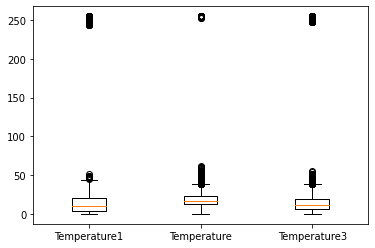

In [139]:
# Boxplot, to get an overview of the data
label = ["Temperature1","Temperature","Temperature3"]
plt.boxplot([temp_int,temp_int2,temp_int3], labels = label)
plt.show()

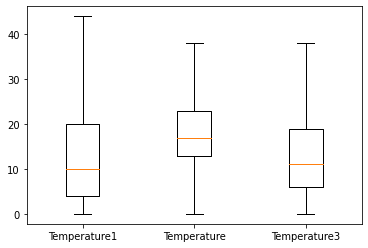

In [140]:
# Boxplot without outlier
plt.boxplot([temp_int,temp_int2, temp_int3], labels = label, showfliers=False)
plt.show()

In [14]:
# To clean outlier from our data, first we have to merge the timestemps with the temperature
# Convert time into list
time1_lst, time2_lst, time3_lst = list(time1),list(time2),list(time3)

# for simplicity, we remove everything except YYYY.MM from the time stemp
datum = [time1_lst[i][0:7] for i in range(0, len(time1_lst))]
datum2 = [time2_lst[i][0:7] for i in range(0, len(time2_lst))]
datum3 = [time3_lst[i][0:7] for i in range(0, len(time3_lst))]

# merge datum and temperature
temp_datum, temp_datum2, temp_datum3 = list(zip(datum,temp_int)), list(zip(datum2,temp_int2)), list(zip(datum3,temp_int3))

# remove the outlieres (temp > 200°C)
clean_temp_datum = [x for x in temp_datum if x[-1] < 200]
clean_temp_datum2 = [x for x in temp_datum2 if x[-1] < 200]
clean_temp_datum3 = [x for x in temp_datum3 if x[-1] < 200]

print("We removed " + str(len(temp_datum)-len(clean_temp_datum)) +" entries in Container 1, because the Value was above 200°C.")
print("We removed " + str(len(temp_datum2)-len(clean_temp_datum2)) +" entries in Container 2, because the Value was above 200°C.")
print("We removed " + str(len(temp_datum3)-len(clean_temp_datum3)) +" entries in Container 3, because the Value was above 200°C.")

We removed 692 entries in Container 1, because the Value was above 200°C.
We removed 24 entries in Container 2, because the Value was above 200°C.
We removed 151 entries in Container 3, because the Value was above 200°C.


In [15]:
# now we can split the list clean_temp_time again into two lists for plotting. Again for each container.

clean_temp = [x[1] for x in clean_temp_datum]
clean_datum = [x[0] for x in clean_temp_datum]

clean_temp2 = [x[1] for x in clean_temp_datum2]
clean_datum2 = [x[0] for x in clean_temp_datum2]

clean_temp3 = [x[1] for x in clean_temp_datum3]
clean_datum3 = [x[0] for x in clean_temp_datum3]

In [16]:
# Preprocess data for scatterplot

# get the time measurements per month and sort them 05.2020 - 05.2021
mm =[[x,clean_datum.count(x)] for x in set(clean_datum)]
mm.sort()
# we can see now the "clean" mesurements per month
mm_value = [mesurement[1] for mesurement in mm]

# build cummulative sum for the elements
cum_mm_value = np.cumsum(mm_value)

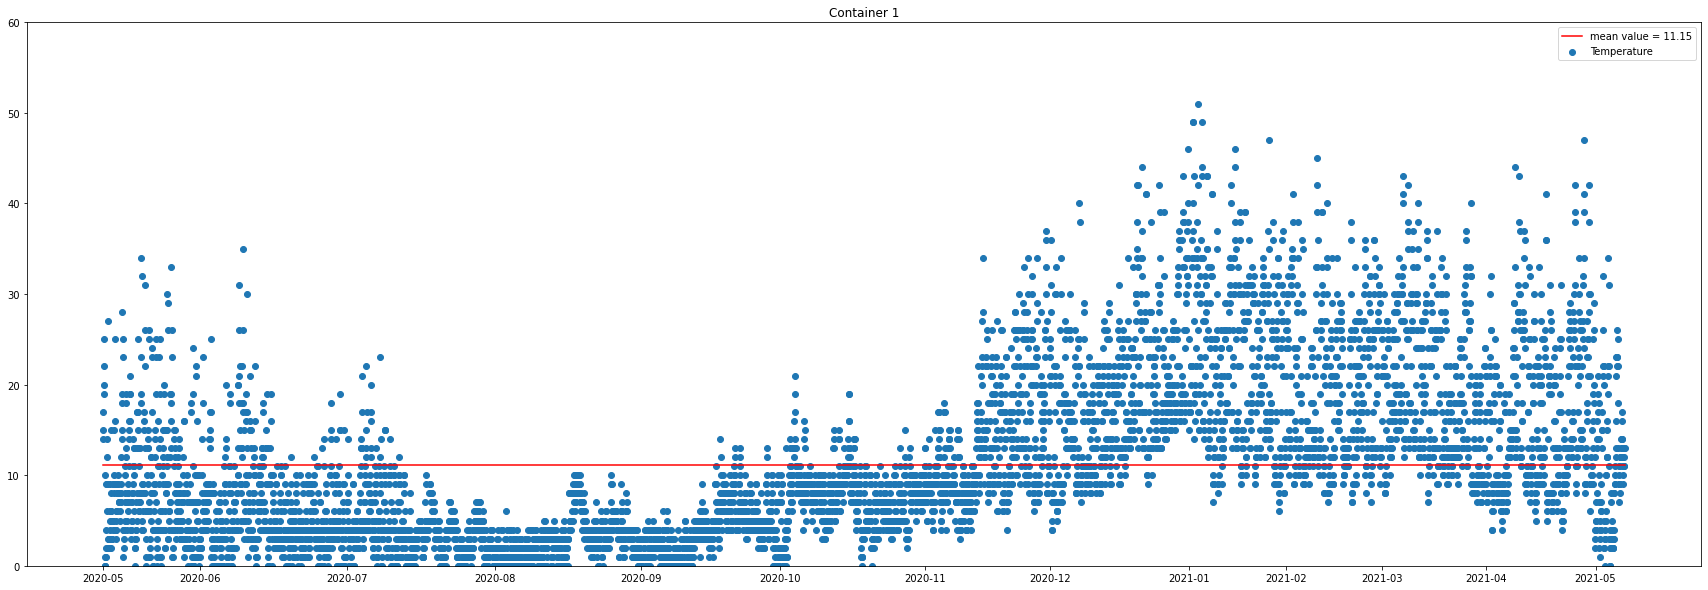

In [17]:
# each month for x-ticks
months = np.unique(clean_datum)

#add 0 as first element
month_starts = np.insert(cum_mm_value,0,0)

# mean value
mean1 = np.mean(clean_temp)

plt.figure(figsize=(30,10))
plt.scatter(list(range(0,len(clean_temp))),clean_temp)
plt.plot([0,len(clean_temp)],[mean1,mean1], c= "red")
plt.title("Container 1")
plt.legend(["mean value = " + str(np.round(mean1,2)), "Temperature"])
plt.ylim(0,60)
plt.xticks(month_starts[:-1],months)
plt.show()

In [18]:
# let's do the same for the other 2 container

# Preprocess data for scatterplot
mm =[[x,clean_datum2.count(x)] for x in set(clean_datum2)]
mm.sort()
# we can see now the "clean" mesurements per month
mm_value = [mesurement[1] for mesurement in mm]

# build cummulative sum for the elements
cum_mm_value = np.cumsum(mm_value)

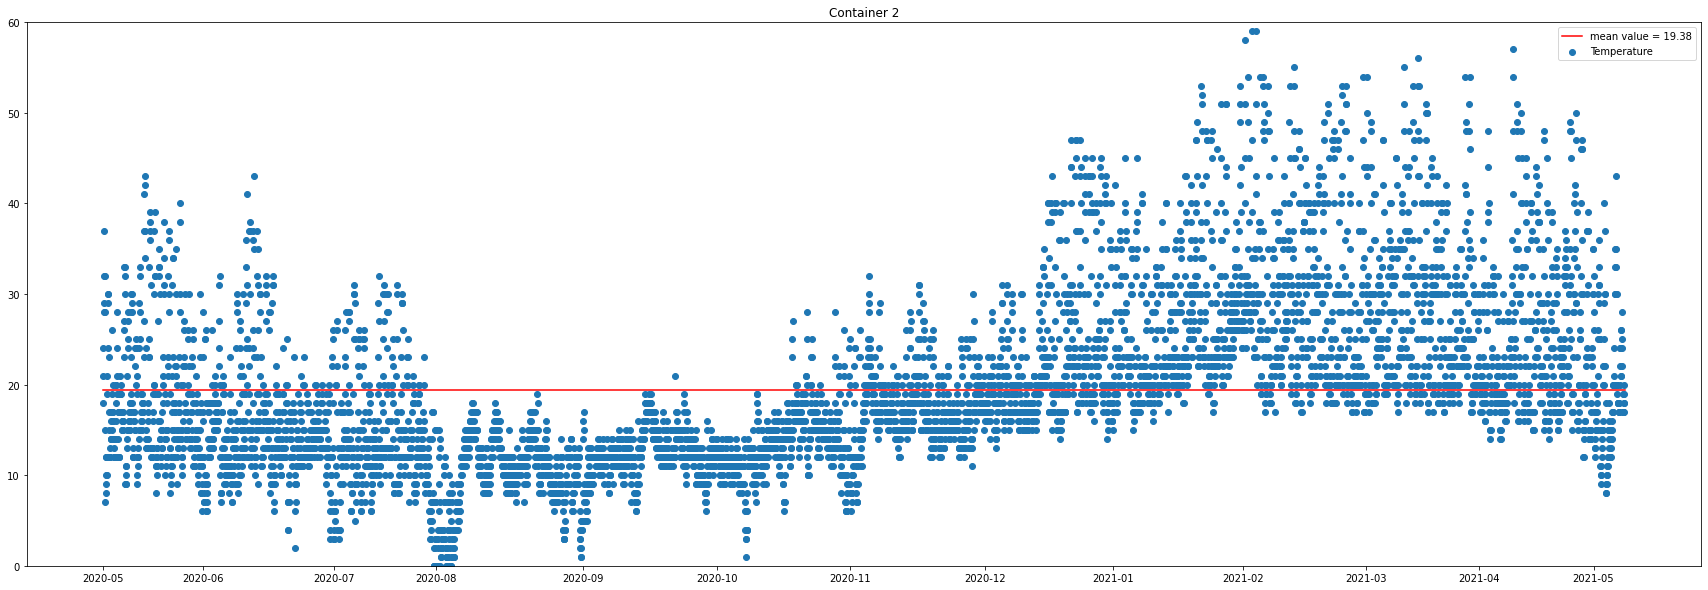

In [19]:
months = np.unique(clean_datum2)
month_starts = np.insert(cum_mm_value,0,0)
mean1 = np.mean(clean_temp2)

plt.figure(figsize=(30,10))
plt.scatter(list(range(0,len(clean_temp2))),clean_temp2)
plt.plot([0,len(clean_temp2)],[mean1,mean1], c= "red")
plt.title("Container 2")
plt.legend(["mean value = " + str(np.round(mean1,2)), "Temperature"])
plt.ylim(0,60)
plt.xticks(month_starts[:-1],months)
plt.show()

In [20]:
# Preprocess data for scatterplot

mm =[[x,clean_datum3.count(x)] for x in set(clean_datum3)]
mm.sort()
# we can see now the "clean" mesurements per month
mm_value = [mesurement[1] for mesurement in mm]

# build cummulative sum for the elements
cum_mm_value = np.cumsum(mm_value)

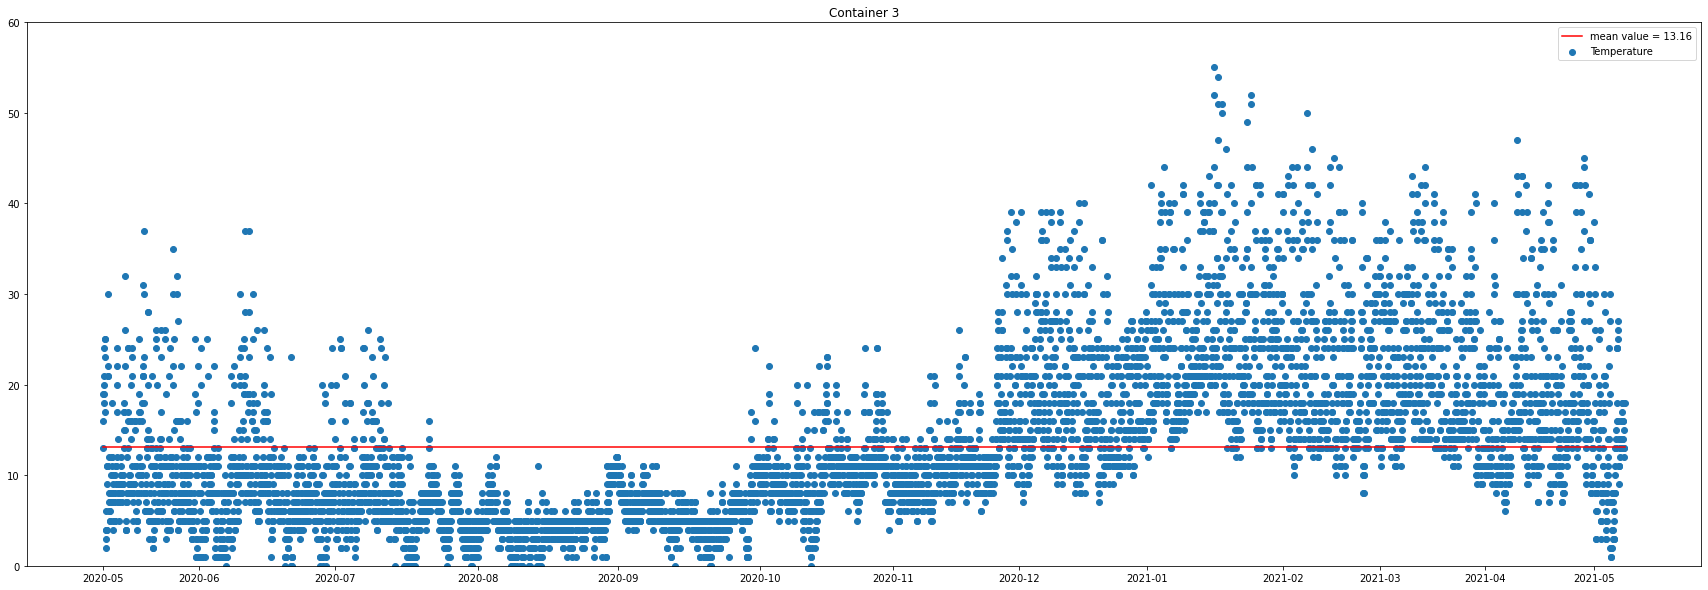

In [21]:
months = np.unique(clean_datum3)
month_starts = np.insert(cum_mm_value,0,0)
mean1 = np.mean(clean_temp3)

plt.figure(figsize=(30,10))
plt.scatter(list(range(0,len(clean_temp3))),clean_temp3)
plt.plot([0,len(clean_temp3)],[mean1,mean1], c= "red")
plt.title("Container 3")
plt.legend(["mean value = " + str(np.round(mean1,2)), "Temperature"])
plt.ylim(0,60)
plt.xticks(month_starts[:-1],months)
plt.show()

## Fragen zur Temperatur:

- Recht viele Outlier von ~250°C (im Container 1 über 600)->woher kommen die?
- warum sind die gemessenen Temperaturen in den Sommermonaten tiefer als in den Wintermonaten?
    - speziell im Winter auch nochmal Temperaturen, die extrem hoch gehen 40-60°C und im August-September wird teils nicht mal der Mean erreicht, woran liegt das?

## Antworten:
- Outlier ~250°C kommen bei nicht fertigen Messungen zustande (man müsste evtl. mal in den Events nachgucken)
- temperaturen von 40-60°C können durchaus im Sommer vorkommen, wenn der Container in der prallen Sonne steht.

## Height + Created_at

In [22]:
# Now we take a look at Height -> see if all 4 columns are equal

pd.DataFrame.equals(df_decoded_data["sensor_data.Height 1"],df_decoded_data["sensor_data.Height 2"])
pd.DataFrame.equals(df_decoded_data["sensor_data.Height 3"],df_decoded_data["sensor_data.Height 4"])
pd.DataFrame.equals(df_decoded_data["sensor_data.Height 1"],df_decoded_data["sensor_data.Height 4"])

pd.DataFrame.equals(df_decoded_data2["sensor_data.Height 1"],df_decoded_data2["sensor_data.Height 2"])
pd.DataFrame.equals(df_decoded_data2["sensor_data.Height 3"],df_decoded_data2["sensor_data.Height 4"])
pd.DataFrame.equals(df_decoded_data2["sensor_data.Height 1"],df_decoded_data2["sensor_data.Height 3"])

pd.DataFrame.equals(df_decoded_data3["sensor_data.Height 1"],df_decoded_data3["sensor_data.Height 2"])
pd.DataFrame.equals(df_decoded_data3["sensor_data.Height 3"],df_decoded_data3["sensor_data.Height 4"])
pd.DataFrame.equals(df_decoded_data3["sensor_data.Height 1"],df_decoded_data3["sensor_data.Height 3"])
# they're all qual so we can just use one of them to represent all.

True

In [23]:
# same procedure as above
# convert values from str to int for plotting
height1 = df_decoded_data["sensor_data.Height 1"]
height2 = df_decoded_data2["sensor_data.Height 1"]
height3 = df_decoded_data3["sensor_data.Height 1"]

height_int1 = [int(h[:-3]) for h in height1]
height_int2 = [int(h[:-3]) for h in height2]
height_int3 = [int(h[:-3]) for h in height3]


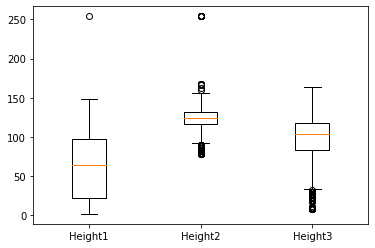

In [24]:
# Boxplot, to get an overview of the data
label = ["Height1", "Height2", "Height3"]
plt.boxplot([height_int1, height_int2, height_int3], labels = label)
plt.show()

In [25]:
# lets continue with outliers inside, because we cant say if this is an incorrect mesurement

# Preprocess data for scatterplot (we take here the datum from above, because we didnt remove any outlier)
mm =[[x,datum.count(x)] for x in set(datum)]
mm.sort()
# we can see now the mesurements per month
mm_value = [mesurement[1] for mesurement in mm]
print(mm)
# build cummulative sum for the elements
cum_mm_value = np.cumsum(mm_value)

[['2020-05', 425], ['2020-06', 635], ['2020-07', 644], ['2020-08', 634], ['2020-09', 607], ['2020-10', 631], ['2020-11', 616], ['2020-12', 691], ['2021-01', 662], ['2021-02', 602], ['2021-03', 515], ['2021-04', 515], ['2021-05', 129]]


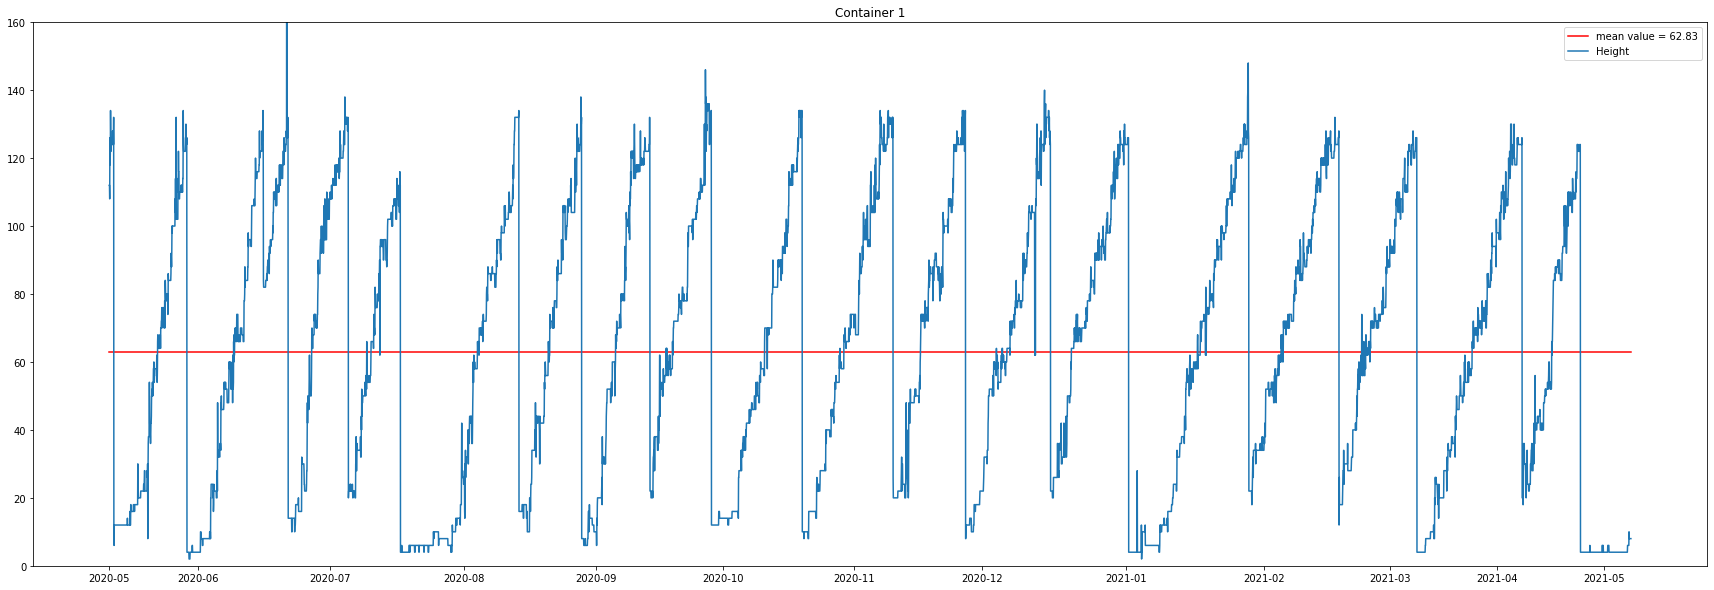

In [26]:
# each month for x-ticks
months = np.unique(datum)

#add 0 as first element
month_starts = np.insert(cum_mm_value,0,0)

# mean value
mean1 = np.mean(height_int1)

plt.figure(figsize=(30,10))
plt.plot([0,len(height_int1)],[mean1,mean1], c= "red")
plt.plot(list(range(0,len(height_int1))),height_int1)
plt.title("Container 1")
plt.legend(["mean value = " + str(np.round(mean1,2)), "Height"])
plt.ylim(0,160)
plt.xticks(month_starts[:-1],months)
plt.show()

In [27]:
# do the same for the two other container
# container 2
# preprocess data
mm =[[x,datum2.count(x)] for x in set(datum2)]
mm.sort()
mm_value = [mesurement[1] for mesurement in mm]
print(mm)
cum_mm_value = np.cumsum(mm_value)

[['2020-05', 422], ['2020-06', 548], ['2020-07', 427], ['2020-08', 619], ['2020-09', 562], ['2020-10', 559], ['2020-11', 566], ['2020-12', 538], ['2021-01', 545], ['2021-02', 539], ['2021-03', 476], ['2021-04', 481], ['2021-05', 131]]


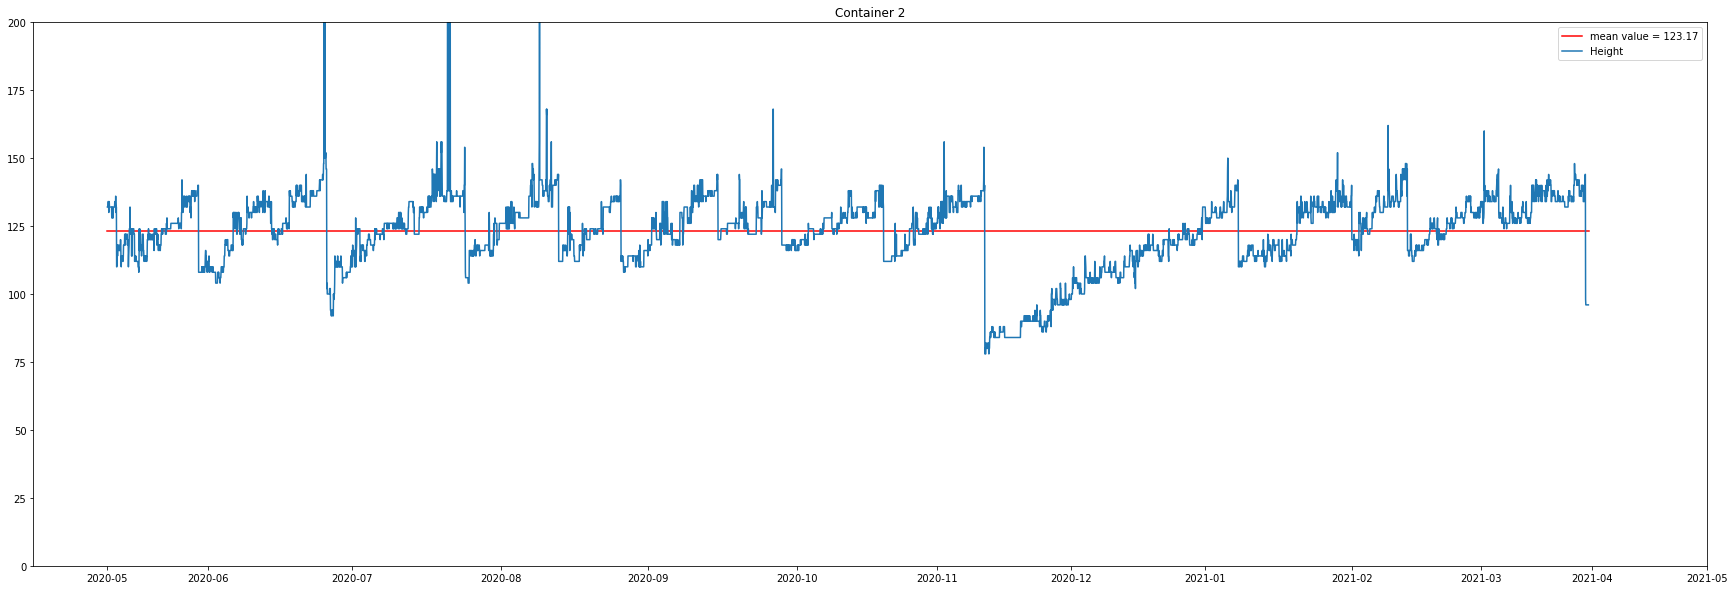

In [151]:
#plotting
months = np.unique(datum2)
month_starts = np.insert(cum_mm_value,0,0)
mean1 = np.mean(height_int2)
plt.figure(figsize=(30,10))
plt.plot([0,len(height_int2)],[mean1,mean1], c= "red")
plt.plot(list(range(0,len(height_int2))),height_int2)
plt.title("Container 2")
plt.legend(["mean value = " + str(np.round(mean1,2)), "Height"])
plt.ylim(0,200)
plt.xticks(month_starts[:-1],months)
plt.show()

In [29]:
# container 3
# preprocess data
mm =[[x,datum3.count(x)] for x in set(datum3)]
mm.sort()
mm_value = [mesurement[1] for mesurement in mm]
print(mm)
cum_mm_value = np.cumsum(mm_value)

[['2020-05', 435], ['2020-06', 622], ['2020-07', 649], ['2020-08', 633], ['2020-09', 647], ['2020-10', 606], ['2020-11', 581], ['2020-12', 578], ['2021-01', 638], ['2021-02', 556], ['2021-03', 484], ['2021-04', 498], ['2021-05', 141]]


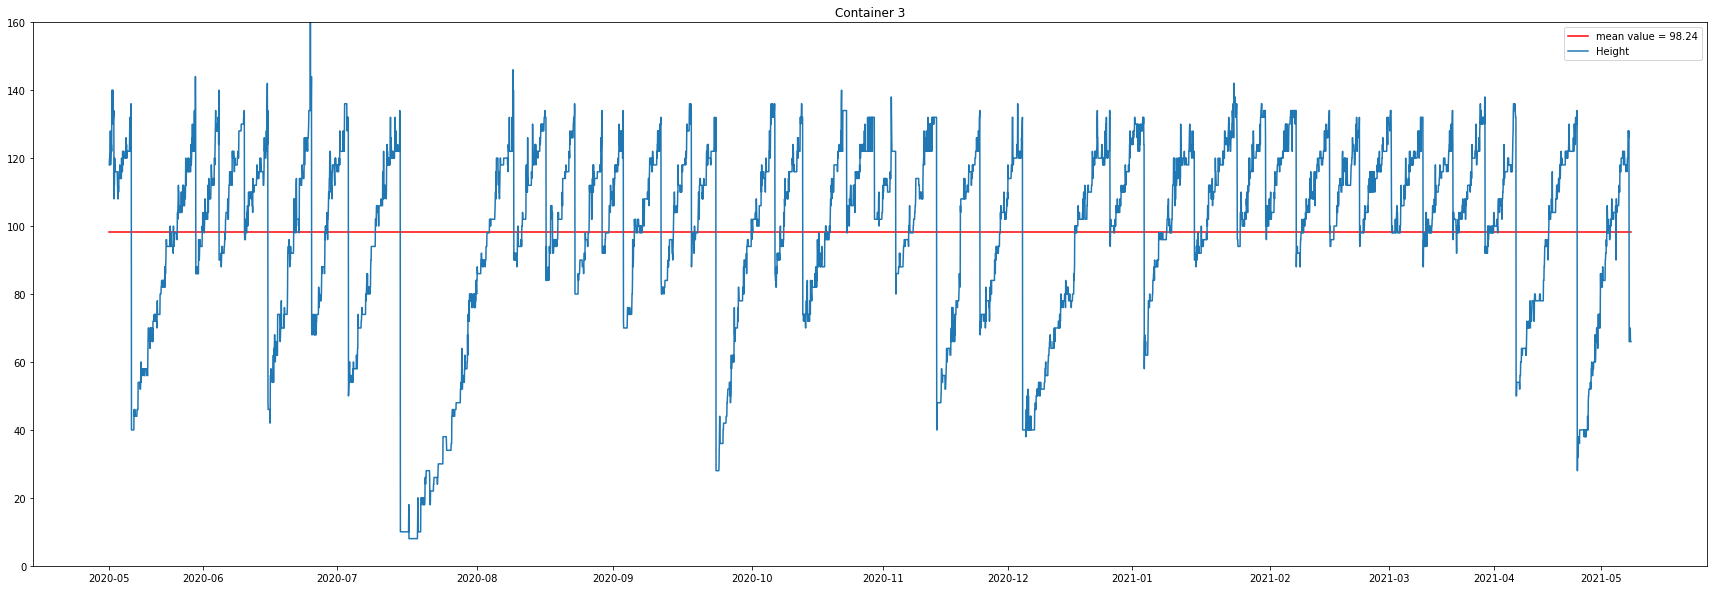

In [30]:
#plotting
months = np.unique(datum3)
month_starts = np.insert(cum_mm_value,0,0)
mean1 = np.mean(height_int3)
plt.figure(figsize=(30,10))
plt.plot([0,len(height_int3)],[mean1,mean1], c= "red")
plt.plot(list(range(0,len(height_int3))),height_int3)
plt.title("Container 3")
plt.legend(["mean value = " + str(np.round(mean1,2)), "Height"])
plt.ylim(0,160)
plt.xticks(month_starts[:-1],months)
plt.show()

## Fragen zu Height
- Woran liegt das, dass die Container teils Füllstände haben, die nicht auf 0 zurückgehen?
    - Bleiben dort reste drin? Misst der Sensor nicht den kompletten Container?
    - Gibt es unterschiedliche Entleerungsmengen?
    - Werden Container nicht häufig genug geleert, dass diese direkt wieder voll gemacht werden nach der leerung (Sensor bekommt   die leerung auf den "0-Stand" garnicht mit
- Container werden unterschiedl. häufig geleert? -> Container 1: 1-2x im Monat, Container 3: 3-4x?

## Antworten:
- Geben Auskunft darüber, wieviel Platz im Container ist (hohe cm Anzahl: Cointainer leer)
- Sensor daten teilweise nicht ganz genau.
- Im Container können sich "Glastürme" bilden und diese können einstürzen -> schwankungen in den daten die keine leerung Darstellen.
- Es kommt zu unterschiedlichen leerungs Intervallen, aber min. 1x alle 2 Wochen